### Importing Required Libraries
- pandas for data manipulation
- numpy for numerical operations
- matplotlib for basic plotting
- seaborn for advanced visualization
- scikit-learn for machine learning
- XGBoost for gradient boosting


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from xgboost import XGBRegressor
from adjustText import adjust_text 

### Loading Training Dataset
Loading the training data for model development


In [3]:
df = pd.read_csv("assets/train.csv")
original_df = df
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Handle missing values


### Handling Missing Values
Addressing missing or null values in the dataset


In [4]:
df.drop(["Id"], axis=1, inplace=True)

# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)  # Fill numeric with median
df.fillna("Unknown", inplace=True)  # Fill categorical with "Unknown"

### Model Training
Training the machine learning model


In [5]:
label_encoders = {}
cat_cols = df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

## Train XGBoost model


### XGBoost Model
Training an XGBoost model


In [6]:
X = df.drop(["SalePrice"], axis=1)
y = df["SalePrice"]

# Train XGBoost model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

### Model Training
Training the machine learning model


In [7]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
top_5_features = feature_importance.nlargest(5).index.tolist()
print("Top 5 Features for Clustering:", top_5_features)


Top 5 Features for Clustering: ['OverallQual', 'GarageCars', 'GrLivArea', 'KitchenAbvGr', 'BsmtQual']


### Model Training
Training the machine learning model


In [8]:
scaler = StandardScaler()
X_top5_scaled = scaler.fit_transform(df[top_5_features])

### Model Evaluation
Evaluating model performance


In [9]:
inertia = []
sil_scores = []
k_range = range(2, 10)

## Sum of squared distances


### Model Training
Training the machine learning model


In [10]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_top5_scaled)
    inertia.append(kmeans.inertia_)  # Sum of squared distances
    sil_scores.append(silhouette_score(X_top5_scaled, kmeans.labels_))  # Silhouette score


### Data Visualization
Creating visualizations to understand the data


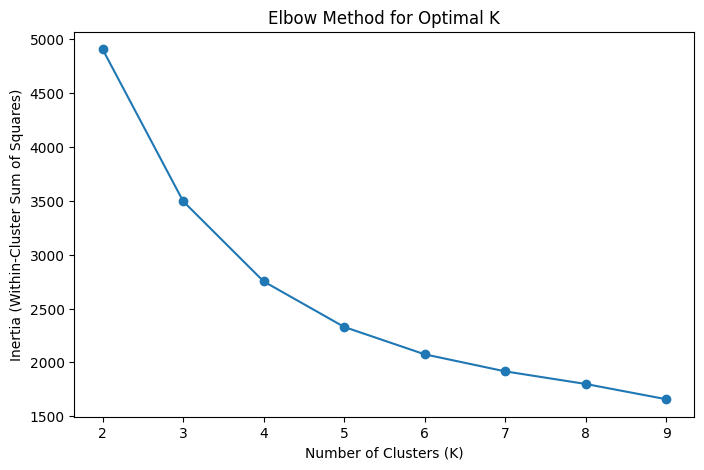

In [11]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker="o", linestyle="-")
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.show()

### Data Visualization
Creating visualizations to understand the data


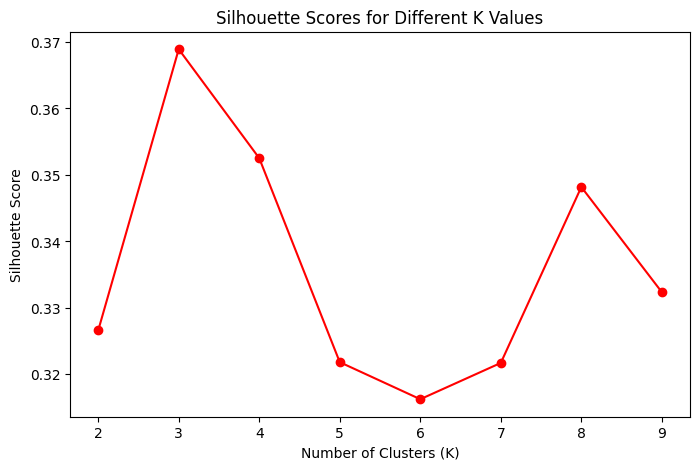

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, sil_scores, marker="o", linestyle="-", color='red')
plt.title("Silhouette Scores for Different K Values")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

## Choose based on elbow & silhouette score


### Model Training
Training the machine learning model


In [13]:
best_k = 4  # Choose based on elbow & silhouette score
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_top5_scaled)


## Group by Cluster and show actual neighborhood names


### Code Execution
Executing code for data analysis or model development


In [14]:

df["Neighborhood_Text"] = label_encoders["Neighborhood"].inverse_transform(df["Neighborhood"])

# Group by Cluster and show actual neighborhood names
neighborhood_clusters = df.groupby("Cluster")["Neighborhood_Text"].unique()

print("\nNeighborhoods in Each Cluster:")
for cluster, neighborhoods in neighborhood_clusters.items():
    print(f"Cluster {cluster}: {list(neighborhoods)}")
print("\nNeighborhoods in Each Cluster:")
for cluster, neighborhoods in neighborhood_clusters.items():
    print(f"Cluster {cluster}: {list(neighborhoods)}")

# **Step 5: Analyze Price Trends per Cluster**
cluster_prices = df.groupby("Cluster")["SalePrice"].mean().sort_values()
print("\nAverage House Prices per Cluster:")
print(cluster_prices)


Neighborhoods in Each Cluster:
Cluster 0: ['CollgCr', 'Veenker', 'Crawfor', 'Mitchel', 'NWAmes', 'BrkSide', 'NridgHt', 'NAmes', 'Somerst', 'Gilbert', 'SawyerW', 'OldTown', 'ClearCr', 'NoRidge', 'IDOTRR', 'NPkVill', 'Sawyer', 'Edwards', 'Timber', 'StoneBr', 'Blmngtn', 'SWISU', 'Blueste', 'MeadowV']
Cluster 1: ['Sawyer', 'NAmes', 'SawyerW', 'IDOTRR', 'MeadowV', 'BrkSide', 'CollgCr', 'Timber', 'OldTown', 'Mitchel', 'Crawfor', 'Edwards', 'ClearCr', 'BrDale', 'SWISU', 'Gilbert', 'NWAmes']
Cluster 2: ['OldTown', 'BrkSide', 'Sawyer', 'Edwards', 'SawyerW', 'Mitchel', 'NAmes', 'Crawfor', 'SWISU', 'IDOTRR', 'NWAmes']
Cluster 3: ['NoRidge', 'Somerst', 'NridgHt', 'CollgCr', 'Mitchel', 'Veenker', 'StoneBr', 'SawyerW', 'Timber', 'OldTown', 'Crawfor', 'NAmes', 'Blmngtn', 'Edwards', 'Gilbert', 'NWAmes', 'ClearCr']

Neighborhoods in Each Cluster:
Cluster 0: ['CollgCr', 'Veenker', 'Crawfor', 'Mitchel', 'NWAmes', 'BrkSide', 'NridgHt', 'NAmes', 'Somerst', 'Gilbert', 'SawyerW', 'OldTown', 'ClearCr', 'NoRi

### Model Training
Training the machine learning model


In [15]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(X_top5_scaled)
df["PCA1"] = df_pca[:, 0]
df["PCA2"] = df_pca[:, 1]


### Importing Required Libraries
- matplotlib for basic plotting
- seaborn for advanced visualization


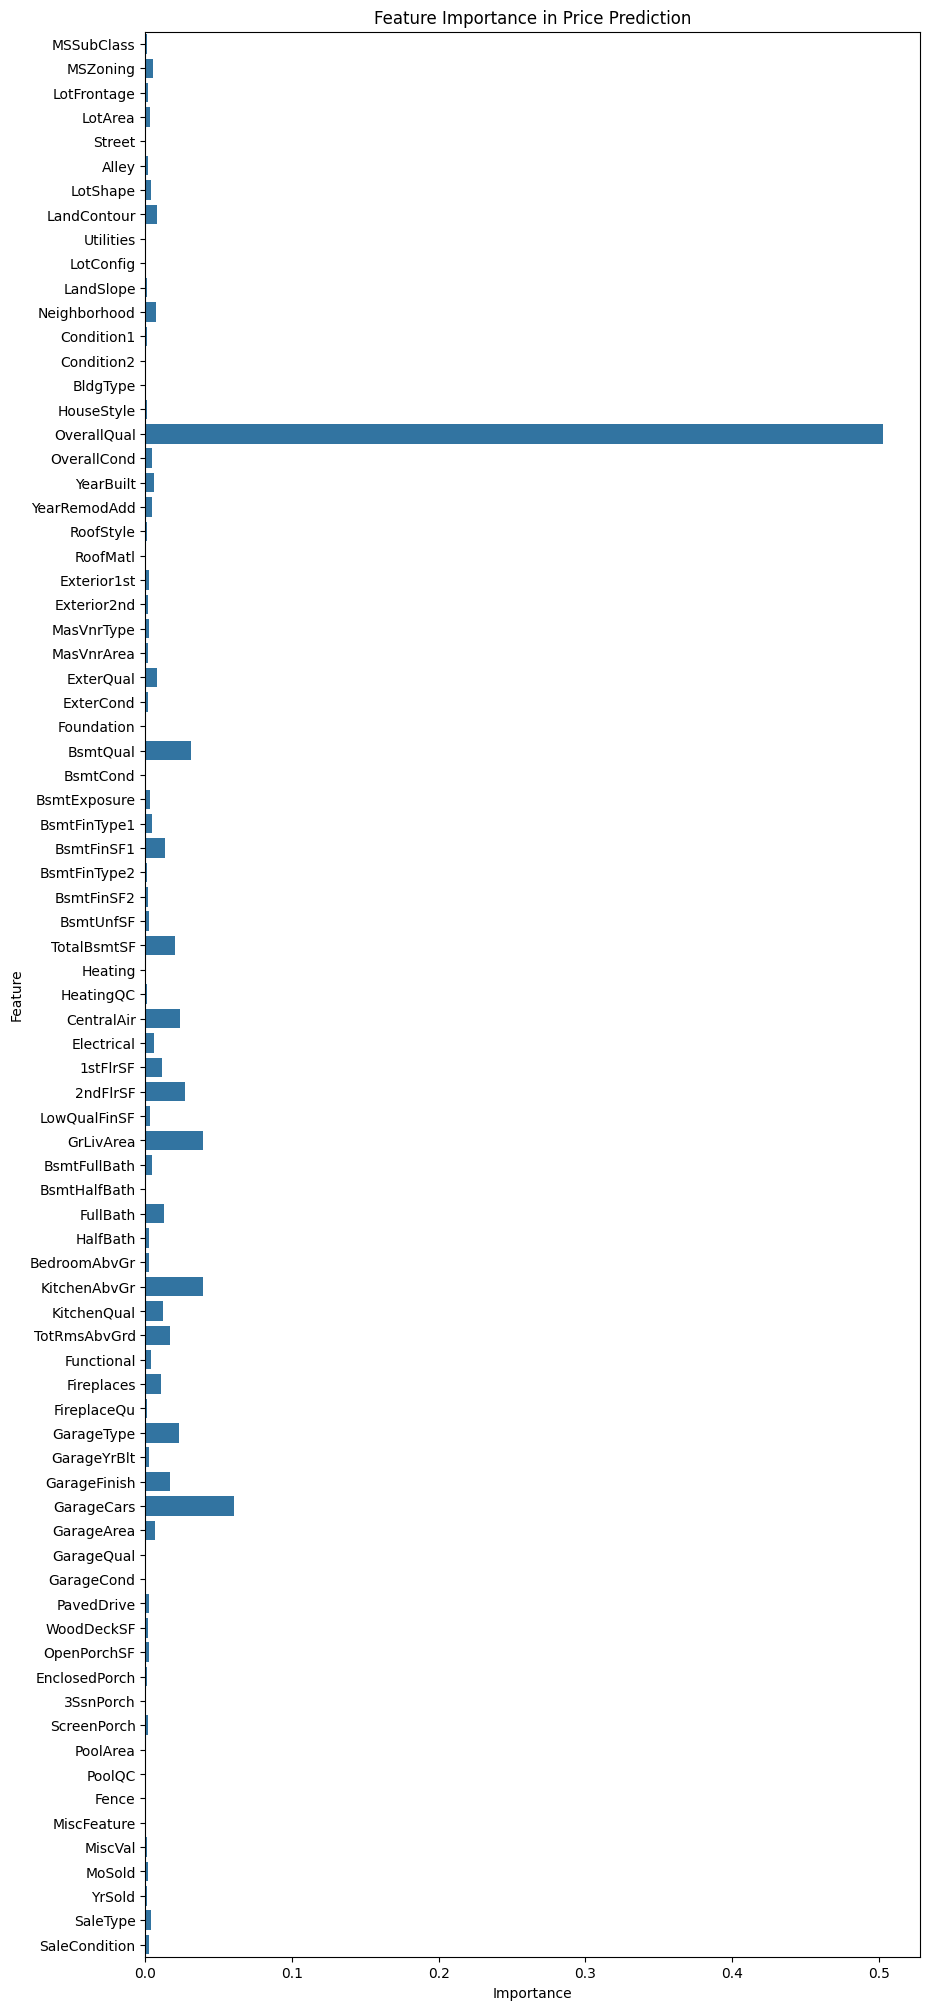

In [16]:
plt.figure(figsize=(10, 25))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title("Feature Importance in Price Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

### Code Execution
Executing code for data analysis or model development


In [17]:
cluster_descriptions = {
    0: "Cluster 0: Affordable housing, older homes, small lots ",
    1: "Cluster 1: Middle-class neighborhoods, rental potential ",
    2: "Cluster 2: Family-friendly, larger homes, newer developments ",
    3: "Cluster 3: Luxury homes, premium locations, high-end finishes "
}

## Reduce clutter by showing fewer labels


### Data Preprocessing
Preparing the data for analysis


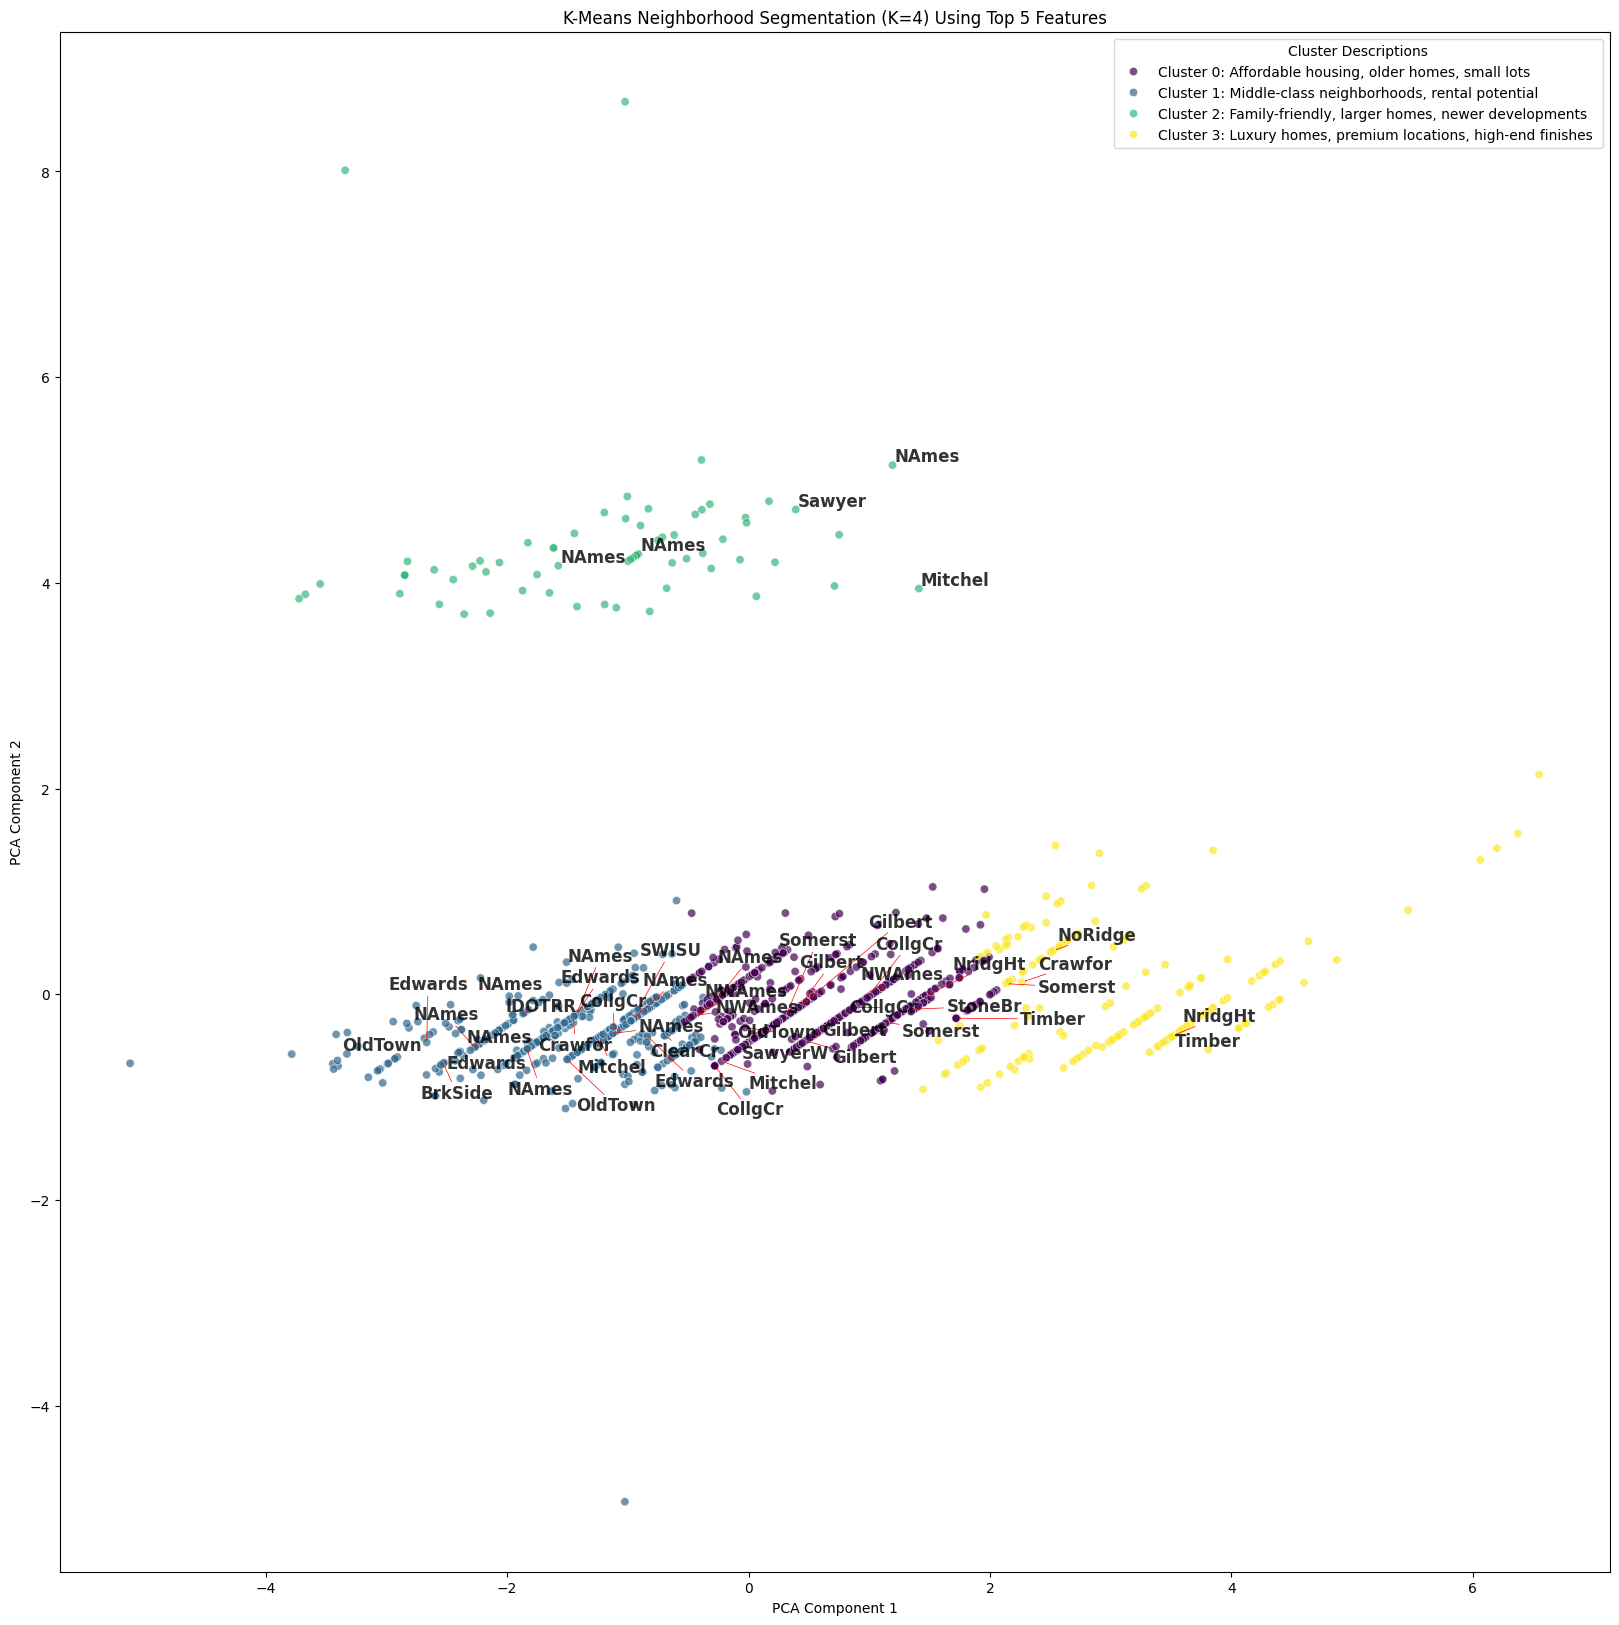

In [18]:
plt.figure(figsize=(20,20))

scatter = sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df["Cluster"], palette="viridis", alpha=0.7)
plt.title(f"K-Means Neighborhood Segmentation (K={best_k}) Using Top 5 Features")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

texts = []
for i in range(df.shape[0]):
    if i % 30 == 0:  # Reduce clutter by showing fewer labels
        texts.append(
            plt.text(
                df["PCA1"][i], df["PCA2"][i], df["Neighborhood_Text"][i], 
                fontsize=12, alpha=0.8, weight="bold"
            )
        )

# Adjust text to prevent overlap
adjust_text(texts, arrowprops=dict(arrowstyle="->", color="red", lw=0.5))

# **Update legend labels with descriptions**
handles, labels = scatter.get_legend_handles_labels()
new_labels = [cluster_descriptions[int(label)] for label in labels]  # Convert cluster numbers to descriptions
plt.legend(handles, new_labels, title="Cluster Descriptions", loc="best")

plt.show()

Affordable Housing Cluster: 1

Affordable Housing Cluster Statistics:
            SalePrice  OverallQual    GrLivArea
mean    124349.046263     4.957295  1131.994662
median  127500.000000     5.000000  1092.000000
min      34900.000000          NaN          NaN
max     256000.000000          NaN          NaN

Neighborhood Distribution in Affordable Cluster:
Neighborhood_Text
NAmes      152
Edwards     74
OldTown     61
Sawyer      55
BrkSide     43
IDOTRR      35
CollgCr     30
Mitchel     21
SWISU       17
MeadowV     16
BrDale      16
Crawfor     15
SawyerW     10
ClearCr     10
NWAmes       4
Gilbert      2
Timber       1
Name: count, dtype: int64

Top Neighborhoods for Affordable Housing Investment Opportunities:
['NAmes', 'Edwards', 'OldTown']

Quality Distribution in Affordable Cluster:
Quality_Category
Below Median    446
Above Median    116
Name: count, dtype: int64

Size Distribution in Affordable Cluster:
Size_Category
Below Median    484
Above Median     78
Name: count, dtyp

C:\Users\Tanay\AppData\Local\Temp\ipykernel_9252\295719141.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Neighborhood_Text", y="SalePrice", data=affordable_df, palette="Set3")


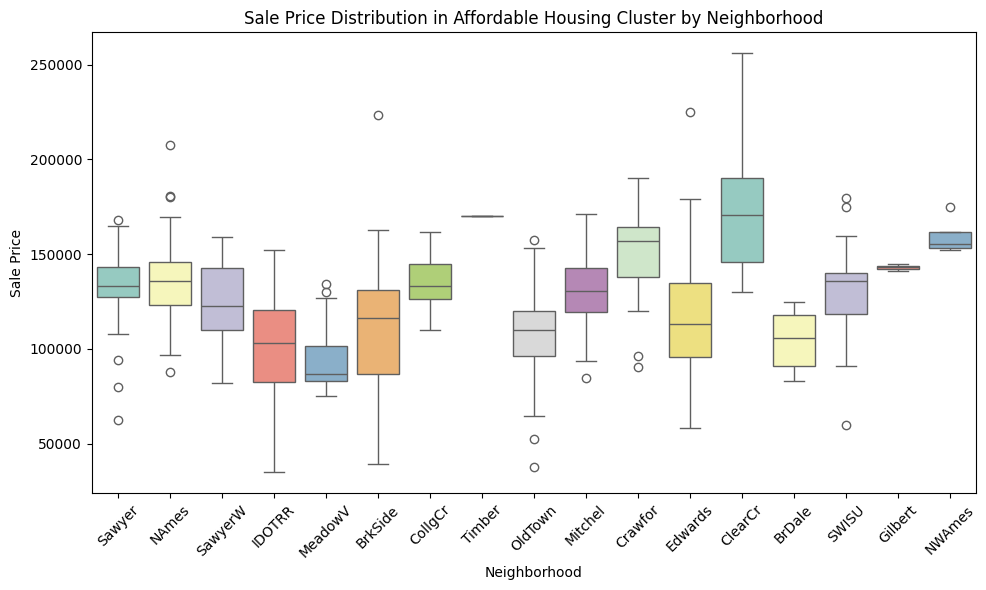

C:\Users\Tanay\AppData\Local\Temp\ipykernel_9252\295719141.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Quality_Category", data=affordable_df, palette="coolwarm")
C:\Users\Tanay\AppData\Local\Temp\ipykernel_9252\295719141.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Size_Category", data=affordable_df, palette="coolwarm")


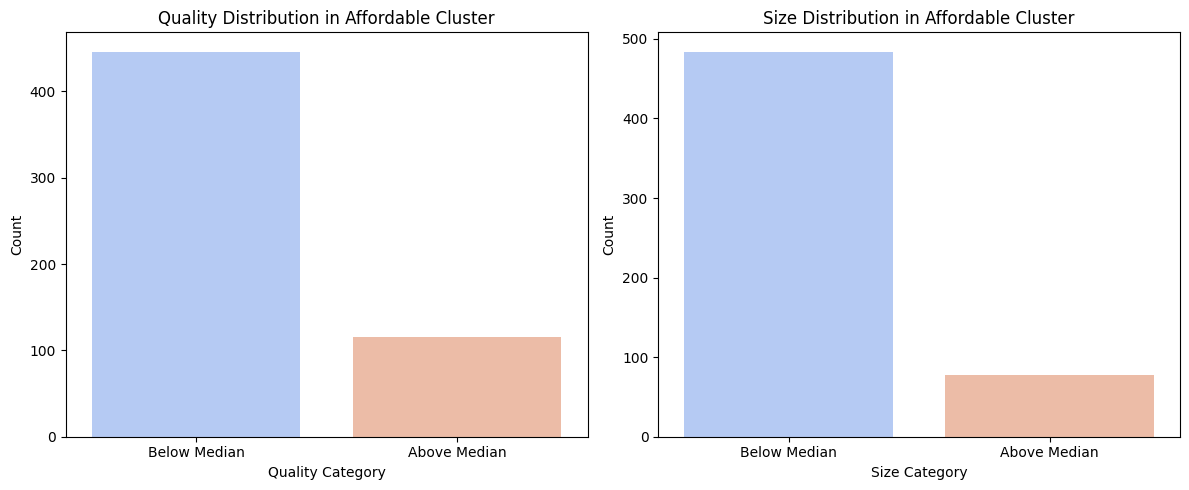

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the original data processing, feature engineering, clustering, PCA and plotting have been executed
# and the DataFrame 'df' now contains columns: Cluster, SalePrice, Neighborhood_Text, OverallQual, GrLivArea, etc.

# ---------------------------------------------------------------------------
# Step 1: Identify the Affordable Housing Cluster
# ---------------------------------------------------------------------------
# Compute the average sale price per cluster and choose the cluster with the lowest mean price
cluster_avg_prices = df.groupby("Cluster")["SalePrice"].mean()
affordable_cluster = cluster_avg_prices.idxmin()
print("Affordable Housing Cluster:", affordable_cluster)

# Filter the data for the affordable cluster
affordable_df = df[df["Cluster"] == affordable_cluster]

# ---------------------------------------------------------------------------
# Step 2: Summarize Characteristics of the Affordable Cluster
# ---------------------------------------------------------------------------
# Basic statistics for sale price, quality, and living area
affordable_stats = affordable_df.agg({
    "SalePrice": ["mean", "median", "min", "max"],
    "OverallQual": ["mean", "median"],
    "GrLivArea": ["mean", "median"],
})
print("\nAffordable Housing Cluster Statistics:")
print(affordable_stats)

# Distribution of neighborhoods in the affordable cluster
neighborhood_counts = affordable_df["Neighborhood_Text"].value_counts()
print("\nNeighborhood Distribution in Affordable Cluster:")
print(neighborhood_counts)

# Identify the top neighborhoods for potential investment
top_neighborhoods = neighborhood_counts.head(3).index.tolist()
print("\nTop Neighborhoods for Affordable Housing Investment Opportunities:")
print(top_neighborhoods)

# ---------------------------------------------------------------------------
# Step 3: Additional Analysis for Policy Recommendations
# ---------------------------------------------------------------------------
# Compare overall quality and living area against the median values in the full dataset
quality_median = df["OverallQual"].median()
size_median = df["GrLivArea"].median()

# Create categorical variables to classify homes within the affordable cluster
affordable_df = affordable_df.copy()  # Avoid SettingWithCopyWarning
affordable_df["Quality_Category"] = np.where(affordable_df["OverallQual"] >= quality_median, "Above Median", "Below Median")
affordable_df["Size_Category"] = np.where(affordable_df["GrLivArea"] >= size_median, "Above Median", "Below Median")

# Count the number of homes in each category for quality and size
quality_counts = affordable_df["Quality_Category"].value_counts()
size_counts = affordable_df["Size_Category"].value_counts()
print("\nQuality Distribution in Affordable Cluster:")
print(quality_counts)
print("\nSize Distribution in Affordable Cluster:")
print(size_counts)

# ---------------------------------------------------------------------------
# Step 4: Generate Investment Insights & Policy Recommendations
# ---------------------------------------------------------------------------
print("\nInvestment Insights and Policy Recommendations:")
print("1. Focus investment in neighborhoods with a high concentration of affordable homes, such as:", top_neighborhoods)
print("2. Encourage renovation initiatives in areas where properties fall below the median quality to uplift property standards.")
print("3. Implement tax incentives and subsidies to support renovations and new affordable housing developments.")
print("4. Invest in community development projects that improve infrastructure and amenities, particularly in neighborhoods with smaller living areas.")
print("5. Collaborate with local governments to develop policies that balance affordable housing investments with sustainable urban growth.")

# ---------------------------------------------------------------------------
# Step 5: Visualizations for Further Insights
# ---------------------------------------------------------------------------
# Visualization: Sale Price Distribution by Neighborhood in the Affordable Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x="Neighborhood_Text", y="SalePrice", data=affordable_df, palette="Set3")
plt.title("Sale Price Distribution in Affordable Housing Cluster by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Sale Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization: Quality and Size Distributions within the Affordable Cluster
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x="Quality_Category", data=affordable_df, palette="coolwarm")
plt.title("Quality Distribution in Affordable Cluster")
plt.xlabel("Quality Category")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
sns.countplot(x="Size_Category", data=affordable_df, palette="coolwarm")
plt.title("Size Distribution in Affordable Cluster")
plt.xlabel("Size Category")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [23]:
# Enhanced Recommendation Model for Real Estate Investment

# Define the investor's budget range
investor_budget_min = 150000  # Example minimum budget
investor_budget_max = 300000  # Example maximum budget

# Filter houses within the budget range from the original data (keeping the 'Id' column)
budget_houses = original_df[
    (original_df["SalePrice"] >= investor_budget_min) & 
    (original_df["SalePrice"] <= investor_budget_max)
].copy()

# Compute additional metrics:
# Price per square foot
budget_houses["Price_per_SqFt"] = budget_houses["SalePrice"] / budget_houses["GrLivArea"]

# Age of the property (assuming current year = 2025)
budget_houses["Property_Age"] = 2025 - budget_houses["YearBuilt"]

# Select features that impact future returns and risk:
features_for_score = ["OverallQual", "GrLivArea", "Price_per_SqFt", "Property_Age"]

# Normalize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(budget_houses[features_for_score])
scaled_df = pd.DataFrame(scaled_features, columns=features_for_score, index=budget_houses.index)

# Combine normalized features using a weighted sum:
# You can adjust these weights based on domain knowledge. For example:
#   - Higher overall quality and larger area contribute positively.
#   - A lower price per SqFt is attractive (hence the negative weight).
#   - Younger properties (i.e., lower Property_Age) might indicate less risk (so we use negative weight for age).
weights = {
    "OverallQual": 1.0, 
    "GrLivArea": 1.0, 
    "Price_per_SqFt": -1.0, 
    "Property_Age": -0.5
}

# Calculate the investment score as a weighted sum of the normalized features
scaled_df["Investment_Score"] = (
    scaled_df["OverallQual"] * weights["OverallQual"] +
    scaled_df["GrLivArea"] * weights["GrLivArea"] +
    scaled_df["Price_per_SqFt"] * weights["Price_per_SqFt"] +
    scaled_df["Property_Age"] * weights["Property_Age"]
)

budget_houses["Investment_Score"] = scaled_df["Investment_Score"]

# Sort houses by the Investment Score (higher is better) and recommend top properties
top_recommendations = budget_houses.sort_values(by="Investment_Score", ascending=False).head(10)

# Display key details for the recommended houses
recommendation_cols = ["SalePrice", "OverallQual", "GrLivArea", "YearBuilt", "Price_per_SqFt", "Property_Age", "Investment_Score"]
print("Top Recommended Houses for Investment:")
print(top_recommendations[recommendation_cols])


Top Recommended Houses for Investment:
      SalePrice  OverallQual  GrLivArea  YearBuilt  Price_per_SqFt  \
1298     160000           10       5642       2008       28.358738   
523      184750           10       4676       2007       39.510265   
197      235000            8       3112       1918       75.514139   
1175     285000            8       2872       1992       99.233983   
1024     287000            8       2898       1976       99.033816   
1031     197000            7       3082       1920       63.919533   
324      242000            7       2978       1967       81.262592   
635      200000            6       3395       1914       58.910162   
261      276000            8       2574       2007      107.226107   
1386     250000            7       2784       1978       89.798851   

      Property_Age  Investment_Score  
1298            17         17.347536  
523             18         14.594642  
197            107          5.596154  
1175            33          5.4842